# 200_analysis_RQ2

## Purpose
This notebook will be focused on analysis for our second RQ:

- "How does a founders education impact the amount of funding received by a startup"

We will investigate a founders education in terms of two aspects, the founders Highest Degree achieved and the institution that they attended. Once we have analysed these two aspects in enough detail in relation to our success metric, we will be able to conclude this RQ. 

This notebook focuses on the following analysis points:
- Most Popular Degree Types
- Sum and Mean total funding for each degree type
- Top 10 institutions attended by founders
- Top 5 institutions across the three main degree types (Bachelors, Masters, PhD)
- Visualisation of split of Bachelors, Masters and PhD across Top 5 institutions.

## Datasets
* _Input_: 350_dataset2.pkl
* _Output_: 200_analysis_RQ2.pkl

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
import seaborn as sns
import networkx as nx
module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
%matplotlib inline

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, lines, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.grid'] = True
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['patch.force_edgecolor'] = True

## Importing dataset 2

This dataset contains information about each founder like their education and also details about the startup they founded. As mentioned in previous notebooks, the reason there are multiple person instances in our dataset is because: 
- A duplicate person instance if they have founded multiple companies.
- A duplicate person instance if they have changed positions in the same company.
- A duplicate person instance if they have attained another degree/changed institution while at the same company.

However, we do not see the need of merging these rows together as they would store too much information. Not only this, having the rows seperated makes it easier for our analysis of this RQ when looking at the Highest Degree and Institutions attended by the founders.

In [3]:
founders_df_raw = pd.read_pickle('../../data/processed/350_dataset2.pkl')
founders_df_raw.shape

(44711, 55)

We now have an appropriate dataset that can be used for our analysis of this RQ on founders education.

In this notebook we will focus on the analysis of the Highest Degree and Institution of a founder. Since our dataset now contains information like the industry of the startup founded the gender of the founder, we can incorporate these into our analysis. These will be used for analysis later on.

**Next Step of Analysis...** 

We have to group the founders so that there are no duplicate instances of founders of an organisation with the same Highest Degree. We will be analysing the Highest Degree aspect more in depth by doing this.

# Looking at Highest Degree of Founders

**First Step...**

We will have to group the founders so that we have no duplicate instances of an individual who has founded a particular startup. The reason why we have duplicate instances has been mentioned multiple times before. 

Grouping the founders by the unique person id and unique organisation it allows us to do this. We can then aggergate the first instance of their Highest Degree.

In [4]:
# degree_vals is a dataframe where all the founders are grouped by their unique organisation id.
# The Highest Degree is then aggergated to this
degree_vals = founders_df_raw.groupby(['person_uuid','org_uuid']).agg({'Highest_Degree':'first'})
degree_vals.head(5)

Highest_Degree
person_uuid                          org_uuid                                           
00026df9-9254-269d-40b1-549e9529550d d2d0cb83-b874-c5d7-c7f7-fb77613cc95b            PhD
000497ac-d3f9-7969-6c8b-b4050c8efc04 14658850-0cc9-15f8-62f3-a8c532ea6c61      Bachelors
000575b8-eac0-66b1-2a16-03c08c2b9f66 d2de0c01-397d-b4f1-8575-9b5e74e6b6b8        Masters
0005da7e-2311-9002-7756-ed2f2734e057 2aec3826-0f75-1f21-326a-5dbca9d5ff15        Masters
                                     bd4c4326-ef34-d5d9-b689-0c0b0a6ba03c        Masters

It would be interesting to see the value counts for each degree type to see which ones are the most popular.

In [5]:
degree_vals.Highest_Degree.value_counts()

Bachelors      13188
Masters        12288
PhD             3363
Juris            398
Doctorate        247
certificate      193
Diploma          153
Executive        120
Honors           114
Name: Highest_Degree, dtype: int64

**Plotting these values results in the bar chart below...**

Text(0.5,0,'Degree Types')

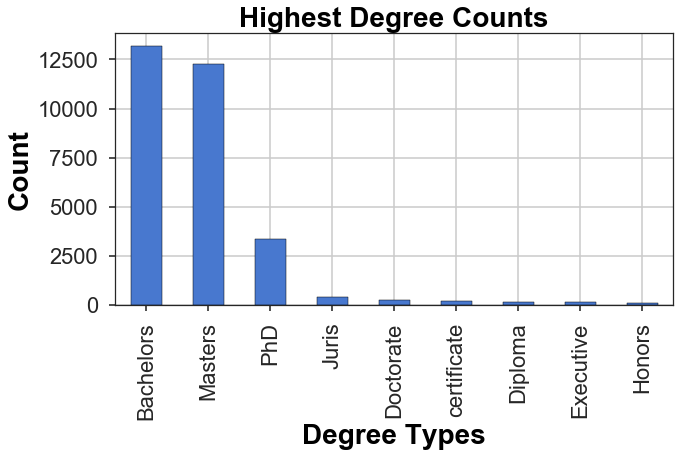

In [6]:
degree_vals.Highest_Degree.value_counts().plot.bar(stacked=True,figsize=(10,5))
plt.ylabel("Count")
plt.title("Highest Degree Counts")
plt.xlabel("Degree Types")

### Relationship between funding and highest degree achieved
Since we are looking at the relationship between a founders education and the amount of funding received, it would be interesting to see what degree has the highest funding **sum** total.

In [7]:
group_degree_df = founders_df_raw.groupby(['Highest_Degree','org_uuid'],as_index=False).agg({"funding_total_usd":"first"})
sum_hdegrees = group_degree_df.groupby('Highest_Degree').agg({"funding_total_usd":"sum"})
sum_hdegrees

,funding_total_usd
Highest_Degree,
Bachelors,3.453854e+11
Diploma,3.394211e+09
Doctorate,9.181618e+09
Executive,2.882456e+09
Honors,1.215919e+09
Juris,1.820642e+10
Masters,3.597671e+11
PhD,1.403129e+11
certificate,6.190050e+09


In [8]:
# getting values in terms of billions
sum_hdeg_billi = sum_hdegrees/1000000000
sum_hdeg_billi

,funding_total_usd
Highest_Degree,
Bachelors,345.385391
Diploma,3.394211
Doctorate,9.181618
Executive,2.882456
Honors,1.215919
Juris,18.206417
Masters,359.767119
PhD,140.312942
certificate,6.190050


**Plotting these values results in the bar chart below...**

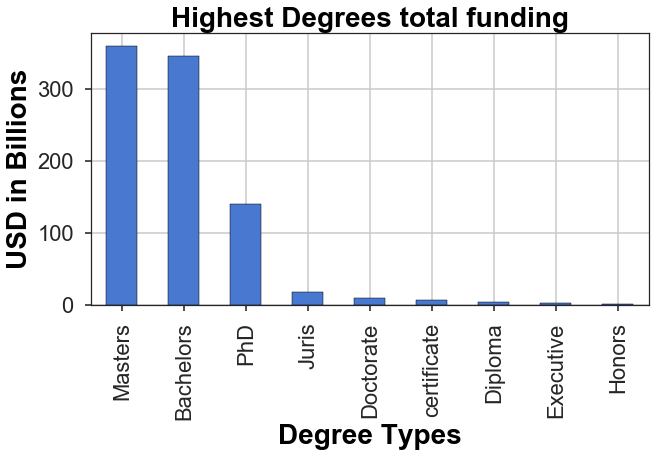

In [9]:
sum_hdeg_billi.sort_values('funding_total_usd', ascending=False).plot.bar(figsize=(10,5))
plt.xlabel("Degree Types")
plt.title("Highest Degrees total funding")
plt.ylabel("USD in Billions")
plt.ticklabel_format(style='plain', axis='y')
plt.legend().set_visible(False)

It can be seen by this chart that founders who have attained a Master's Degree as their highest degree throughout their  career received the most funding. It is to be noted that they may not have attained the degree at the time of founding the startup. It is still very interesting to see that a Masters and Bachelors degree dominate this chart. The steep drop off to a PhD was not something we expected.

We both found it interesting that a founder with a masters as their highest degree achieved the most cumulative funding. We will do further analysis of this later.

**Next Step of Analysis...**

We have just looked at the total sum of each degree type. However, it would now be interesting to see the change when looking at the **mean funding** received for each degree type. We have seen the degree type counts above so we will keep these in mind when looking at the results to this analysis. 

We have also noticed that the range for these funding totals for each degree are very large so this might be something to look into to improve results accuracy. 

In [10]:
group_degree_df = founders_df_raw.groupby(['Highest_Degree','org_uuid'],as_index=False).agg({"funding_total_usd":"first"})
mean_hdegrees = group_degree_df.groupby('Highest_Degree').agg({"funding_total_usd":"mean"})
mean_hdegrees

,funding_total_usd
Highest_Degree,
Bachelors,3.206623e+07
Diploma,2.247822e+07
Doctorate,3.809800e+07
Executive,2.463637e+07
Honors,1.085642e+07
Juris,4.741254e+07
Masters,3.489158e+07
PhD,4.945821e+07
certificate,3.240864e+07


In [11]:
# getting values in terms of millions
mean_hdeg_milli = mean_hdegrees/1000000
mean_hdeg_milli

,funding_total_usd
Highest_Degree,
Bachelors,32.066233
Diploma,22.478216
Doctorate,38.097999
Executive,24.636372
Honors,10.856422
Juris,47.412544
Masters,34.891584
PhD,49.458210
certificate,32.408641


It can be seen by this chart that founders who have attained a Master's Degree as their highest degree throughout their  career received the most funding. It is to be noted that they may not have attained the degree at the time of founding the startup. It is still very interesting to see that a Masters and Bachelors degree dominate this chart. The steep drop off to a PhD was not something we expected.

We both found it interesting that a founder with a masters as their highest degree achieved the most cumulative funding. We will do further analysis of this later.

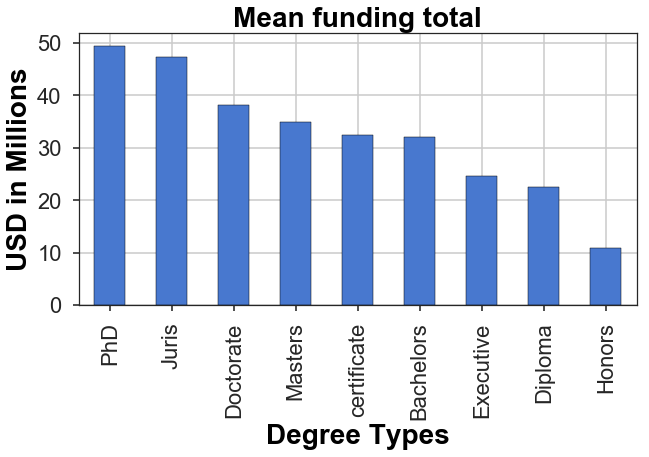

In [12]:
mean_hdeg_milli.sort_values('funding_total_usd', ascending=False).plot.bar(figsize=(10,5))
plt.xlabel("Degree Types")
plt.ylabel("USD in Millions")
plt.title("Mean funding total")
plt.ticklabel_format(style='plain', axis='y')
plt.legend().set_visible(False)

## Looking at Top 10 Institutions attended by Founders
As we have mentioned previously, the institution which the founder attended is anonymized. However we are able to decipher this easily by simply searching the name of the person with a certain 'id' and viewing their Crunchbase profile. The education which the founder received is detailed here and thus we do not consider this as an unethical practice. We then assign this unique institution id with a name that can be used for our analysis.

In [13]:
founders_df_raw.head(10)

,first_name,last_name,gender,company_name,funding_rounds,funding_total_usd,primary_role,country_code,state_code,city,...,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
0,Steve,Wozniak,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,...,0,0,0,0,0,0,0,1,0,0
1,Kevin,Harvey,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,...,0,0,0,0,0,0,0,1,0,0
2,Armas,Markkula,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,...,0,0,0,0,0,0,0,1,0,0
3,Armas,Markkula,male,Apple,4,6.150250e+09,company,USA,CA,Cupertino,...,0,0,0,0,0,0,0,1,0,0
4,Kristee,Rosendahl,female,Apple,4,6.150250e+09,company,USA,CA,Cupertino,...,0,0,0,0,0,0,0,1,0,0
5,Nolan,Bushnell,male,Atari,2,2.226000e+07,company,USA,NY,New York,...,0,0,0,0,0,0,0,1,0,0
6,Nolan,Bushnell,male,Atari,2,2.226000e+07,company,USA,NY,New York,...,0,0,0,0,0,0,0,1,0,0
7,Eduardo,Saverin,male,Facebook,11,2.335700e+09,company,USA,CA,Menlo Park,...,0,0,0,0,0,0,0,1,0,0
8,Dustin,Moskovitz,male,Facebook,11,2.335700e+09,company,USA,CA,Menlo Park,...,0,0,0,0,0,0,0,1,0,0
9,Andrew,McCollum,male,Facebook,11,2.335700e+09,company,USA,CA,Menlo Park,...,0,0,0,0,0,0,0,1,0,0


Our current dataframe has duplicate rows for a founder who has attended an institution if different degrees were attained. Thus we need to group the founders so that the institution they attended is only counted once and not multiple times. Thus, we will use the groupby function to acheive this.

For Example: John Donovan (ID 3) has an instance detailing he achieved a Bachelors degree at an institution and then the following instance details that he attained a Masters degree at the same institution. We only want to count the fact he attended this institution once.

**Next Step of Analysis...** 

We want to **decode the Top 10 institutions of Founders** in the institutions_df. 

Impotant: **If an institution has a (B) after it then its referring to the institutions business school.**
We are not able to decode all the business schools in the institutions for obvious reasons. We will group these business into the main institution later in our analysis. For instance Harvard(B) will be counted as Harvard.

The method of decoding these institutions is by searching the individual's name on CrunchBase.com and manually assigning the institution they attended to the inst ititution_uuid.

In [14]:
institutions_df = founders_df_raw.groupby(['person_uuid','org_uuid','institution_uuid'],as_index=False).agg({'first_name':'first','last_name':'first'})
institutions_df['institution_uuid'].value_counts().head(13)

20135206-96eb-8be0-9ac4-670b257e532c    1368
6599f877-7c83-0c47-b05b-dbedd3db7b3a     966
10f9a25b-9675-2281-486e-a52955c706df     750
d8b57c0e-9f0f-4dcb-d207-a12a90c64a2d     740
630773ca-bbdf-bb41-2985-41a23ffdd01a     678
e3a55987-fdbb-cb79-fcb2-7261461b43a5     505
e596515e-38e2-c9c0-7584-a46a8b1ff871     487
7300e89a-2e8e-23d3-3e9a-8f25b2a127f0     431
e72aab01-fbef-7d21-ac1d-84ee1413fddd     405
8d297d1e-3e3d-fadd-2963-57e0a40bff2a     383
dcb99002-9225-c513-27c6-9002b6103bc0     378
94a74e17-c5e4-f996-b2b0-4c9d4db492db     366
6cca2a58-6c3c-9abb-5380-6de702a56710     344
Name: institution_uuid, dtype: int64

In [15]:
t10_inst = ['20135206-96eb-8be0-9ac4-670b257e532c',
            '6599f877-7c83-0c47-b05b-dbedd3db7b3a',
            '10f9a25b-9675-2281-486e-a52955c706df',
            'd8b57c0e-9f0f-4dcb-d207-a12a90c64a2d',
            '630773ca-bbdf-bb41-2985-41a23ffdd01a',
            'e3a55987-fdbb-cb79-fcb2-7261461b43a5',
            'e596515e-38e2-c9c0-7584-a46a8b1ff871',
            'e72aab01-fbef-7d21-ac1d-84ee1413fddd',
            'dcb99002-9225-c513-27c6-9002b6103bc0',
            '7300e89a-2e8e-23d3-3e9a-8f25b2a127f0']

In [16]:
institutions_df[institutions_df['institution_uuid']==t10_inst[0]].head(1)
# 20135206-96eb-8be0-9ac4-670b257e532c = Stanford University

,person_uuid,org_uuid,institution_uuid,first_name,last_name
57,0056e384-e02c-3400-bf35-e4d42bbdf511,9caa6135-6881-6ad6-9e0f-f112e87dd455,20135206-96eb-8be0-9ac4-670b257e532c,Jungsang,Kim


In [17]:
institutions_df[institutions_df['institution_uuid']==t10_inst[1]].head(5)
# '6599f877-7c83-0c47-b05b-dbedd3db7b3a' = MIT

,person_uuid,org_uuid,institution_uuid,first_name,last_name
92,00911d47-fc78-60ab-03ea-6182f1f86eb1,722c098a-37f2-be10-6d41-bad0b2aa1bff,6599f877-7c83-0c47-b05b-dbedd3db7b3a,Julia,Hu
201,0168dc13-e817-e779-c237-47fbf563c993,e3b3a78b-9601-6c3a-6bca-2bcd325686a2,6599f877-7c83-0c47-b05b-dbedd3db7b3a,Eugene,Feldman
276,01fb2594-23aa-ee7c-3da9-9ed06e73a333,93cbd092-b147-09f3-41b1-622cf919eb7b,6599f877-7c83-0c47-b05b-dbedd3db7b3a,Jose,Bohorquez
304,022f24e1-0ff8-298f-608a-4ef9d496c9b9,91128672-9cca-4ba1-8b50-a1fb661e1ff5,6599f877-7c83-0c47-b05b-dbedd3db7b3a,Babar,Bhatti
308,02325cea-62bc-596d-79d8-364541003bef,e6449ca5-2268-5cf7-96ca-b808a234da00,6599f877-7c83-0c47-b05b-dbedd3db7b3a,Drew,Houston


In [18]:
institutions_df[institutions_df['institution_uuid']==t10_inst[2]].head(1)
# '10f9a25b-9675-2281-486e-a52955c706df' = University of California, Berkely

,person_uuid,org_uuid,institution_uuid,first_name,last_name
99,00a2f721-a316-43a5-83bf-48dd1ad49a31,fb5d3118-f330-4b3d-a71a-dceb6bd83d6c,10f9a25b-9675-2281-486e-a52955c706df,Stella,Sarraf


In [19]:
institutions_df[institutions_df['institution_uuid']==t10_inst[3]].head(1)
# 'd8b57c0e-9f0f-4dcb-d207-a12a90c64a2d' = Harvard University

,person_uuid,org_uuid,institution_uuid,first_name,last_name
77,007fa95a-f316-e774-8891-460f05700a35,3abed6bf-6209-9470-de15-82a5a2ecbb60,d8b57c0e-9f0f-4dcb-d207-a12a90c64a2d,Tom,Leung


In [20]:
institutions_df[institutions_df['institution_uuid']==t10_inst[4]].head(3)
# '630773ca-bbdf-bb41-2985-41a23ffdd01a' = Harvard Business School

,person_uuid,org_uuid,institution_uuid,first_name,last_name
190,0159561f-be5d-81eb-7ccd-b4d6efeb30fc,297df5af-da41-a709-7df2-7e7f04e53454,630773ca-bbdf-bb41-2985-41a23ffdd01a,Mark,Pincus
192,0159561f-be5d-81eb-7ccd-b4d6efeb30fc,5755808e-7daa-38f5-12ee-a2d785546413,630773ca-bbdf-bb41-2985-41a23ffdd01a,Mark,Pincus
236,01c1deaa-9632-60b9-f4ca-0a23f6c77b62,e45f7dce-f8a6-734d-916c-d6261e21a272,630773ca-bbdf-bb41-2985-41a23ffdd01a,Kyle,Green


In [21]:
institutions_df[institutions_df['institution_uuid']==t10_inst[5]].head(4)
# 'e3a55987-fdbb-cb79-fcb2-7261461b43a5' = Tel Aviv, Israel

,person_uuid,org_uuid,institution_uuid,first_name,last_name
95,009c8707-e596-a869-7a92-317d9c498c16,209e1e67-5512-52ee-93cd-e01e9fea79d8,e3a55987-fdbb-cb79-fcb2-7261461b43a5,Yaron,Segev
96,009c8707-e596-a869-7a92-317d9c498c16,317d7bdd-e0d4-0f7d-24a3-b1b737aaac34,e3a55987-fdbb-cb79-fcb2-7261461b43a5,Yaron,Segev
195,015dfd0b-6368-37fc-aa3c-89bdbf74c9c8,cee9fc3b-4dd1-de85-7b57-4d173f8840d1,e3a55987-fdbb-cb79-fcb2-7261461b43a5,Itay,Baruchi
318,023d3f08-4bb9-eeac-518f-0004ef673027,7b5a933f-fd04-cfa4-444e-483a30671441,e3a55987-fdbb-cb79-fcb2-7261461b43a5,Yoni,Lindenfeld


In [22]:
institutions_df[institutions_df['institution_uuid']==t10_inst[6]].head(3)
# 'e596515e-38e2-c9c0-7584-a46a8b1ff871' = Cornell University

,person_uuid,org_uuid,institution_uuid,first_name,last_name
19,00141ae2-df2d-accc-3f96-b062f80c6ead,1e5307ed-cc85-5a83-72a5-1700f392297b,e596515e-38e2-c9c0-7584-a46a8b1ff871,Ankur,Bulsara
20,00141ae2-df2d-accc-3f96-b062f80c6ead,4f9d1777-57c4-775b-bf79-789bf339f30d,e596515e-38e2-c9c0-7584-a46a8b1ff871,Ankur,Bulsara
89,008e14b9-0c7f-0da9-14d2-b43ee39cc61e,df031099-5650-2399-79b6-830aa87c9d64,e596515e-38e2-c9c0-7584-a46a8b1ff871,Sloane,Yu


In [23]:
institutions_df[institutions_df['institution_uuid']==t10_inst[7]].head(3)
# 'e72aab01-fbef-7d21-ac1d-84ee1413fddd' = University of Pennsylvania

,person_uuid,org_uuid,institution_uuid,first_name,last_name
177,014531cd-fd8f-60b7-3ccd-e7be916ea408,be5128c1-4e0e-84b7-1e71-8c0ddbfb4f1a,e72aab01-fbef-7d21-ac1d-84ee1413fddd,Jorge,Perdomo
191,0159561f-be5d-81eb-7ccd-b4d6efeb30fc,297df5af-da41-a709-7df2-7e7f04e53454,e72aab01-fbef-7d21-ac1d-84ee1413fddd,Mark,Pincus
193,0159561f-be5d-81eb-7ccd-b4d6efeb30fc,5755808e-7daa-38f5-12ee-a2d785546413,e72aab01-fbef-7d21-ac1d-84ee1413fddd,Mark,Pincus


In [24]:
institutions_df[institutions_df['institution_uuid']==t10_inst[8]].head(3)
# 'dcb99002-9225-c513-27c6-9002b6103bc0' = Yale University

,person_uuid,org_uuid,institution_uuid,first_name,last_name
286,020d410a-0a9e-ff0f-f81c-4f778f365fa1,787abe0b-3f63-7ad0-aefe-f873105f0e4e,dcb99002-9225-c513-27c6-9002b6103bc0,Collin,Jackson
365,027fd2a5-8197-f394-b8e0-07bfd57951a9,d4200dc1-9498-be6c-6f4f-cfdf73c4bde5,dcb99002-9225-c513-27c6-9002b6103bc0,Tom,Katis
500,033ebb1f-369e-286e-f682-1fb53893159c,450b9605-db2f-4ca7-9ffb-993df5b7e73d,dcb99002-9225-c513-27c6-9002b6103bc0,Spencer,Fry


In [25]:
institutions_df[institutions_df['institution_uuid']==t10_inst[9]].head(3)
# '7300e89a-2e8e-23d3-3e9a-8f25b2a127f0' = Wharton School of the University of Pennsylvania

,person_uuid,org_uuid,institution_uuid,first_name,last_name
521,034d7555-5b2a-ffe2-30c1-39cb7cc557c5,4b943117-d251-1bee-8a63-a6e07e1feb00,7300e89a-2e8e-23d3-3e9a-8f25b2a127f0,Teddy,Zhang
579,038d239a-ecaa-b35a-10b2-7554c12ab3db,a6709b84-9dfd-319b-751f-b1e8bf07da7e,7300e89a-2e8e-23d3-3e9a-8f25b2a127f0,Mark,Goldman
718,047fa590-0176-be8d-3c7a-f63789d1ca1d,88b3b1c6-9b24-13af-6e1a-f051db5d9268,7300e89a-2e8e-23d3-3e9a-8f25b2a127f0,Adam,Miller


In [26]:
institutions_df[institutions_df['institution_uuid']=='8d297d1e-3e3d-fadd-2963-57e0a40bff2a'].head(3)
# '8d297d1e-3e3d-fadd-2963-57e0a40bff2a' = Columbia University

,person_uuid,org_uuid,institution_uuid,first_name,last_name
22,00184b35-b9aa-f6c2-898e-0a1a6e0ee1e5,a3826f14-4c4b-eb30-bdd3-d8c516612ace,8d297d1e-3e3d-fadd-2963-57e0a40bff2a,Mihai,Banu
100,00a2f721-a316-43a5-83bf-48dd1ad49a31,fb5d3118-f330-4b3d-a71a-dceb6bd83d6c,8d297d1e-3e3d-fadd-2963-57e0a40bff2a,Stella,Sarraf
240,01c3c9a3-56ce-b320-9cac-b76192215698,503eba80-2a11-c431-fdcb-badf8247410f,8d297d1e-3e3d-fadd-2963-57e0a40bff2a,Matthew,Putman


In [27]:
institutions_df[institutions_df['institution_uuid']=='6cca2a58-6c3c-9abb-5380-6de702a56710'].head(3)
# '6cca2a58-6c3c-9abb-5380-6de702a56710' = Carnegie Mellon University

,person_uuid,org_uuid,institution_uuid,first_name,last_name
575,03896055-6051-4504-8e08-ccd8befd58fd,af552efe-7466-6773-eb37-fc1c7263a078,6cca2a58-6c3c-9abb-5380-6de702a56710,David,Auerbach
624,03d370f0-8683-8f8b-a31e-dbf8702bbed1,fbcb563f-59ca-5bcc-b6cb-2ea26f81c5bf,6cca2a58-6c3c-9abb-5380-6de702a56710,Bharani,Rajakumar
947,06086ba2-9273-7f5c-565d-0b545ad0d2bd,8bd7b52c-d781-df49-305e-a925a42547a3,6cca2a58-6c3c-9abb-5380-6de702a56710,Hahna,Alexander


In [28]:
institutions_df[institutions_df['institution_uuid']=='94a74e17-c5e4-f996-b2b0-4c9d4db492db'].head(1)
# '94a74e17-c5e4-f996-b2b0-4c9d4db492db' = Stanford Business School

,person_uuid,org_uuid,institution_uuid,first_name,last_name
401,02ae4657-5079-3696-32e5-a9217773d45d,2fcb5978-8f30-563e-eb74-d0aa35138a6e,94a74e17-c5e4-f996-b2b0-4c9d4db492db,Jim,Barnett


In [29]:
institutions_df[institutions_df['institution_uuid']=='bda6a1fb-62b4-a091-42c4-b127539e50cd'].head(1)
# 'bda6a1fb-62b4-a091-42c4-b127539e50cd' = Cambridge University

,person_uuid,org_uuid,institution_uuid,first_name,last_name
1,00026df9-9254-269d-40b1-549e9529550d,d2d0cb83-b874-c5d7-c7f7-fb77613cc95b,bda6a1fb-62b4-a091-42c4-b127539e50cd,Theo,Koutroukides


**Next Step...**

We will assign an Institution Name in place of the unique ID given to us by CrunchBase. The reason we do this is so we can easily filter the dataframe in the future when we only want founders who attended these institutions.

In [30]:
founders_df_raw.loc[founders_df_raw['institution_uuid']==t10_inst[0], 'institution_uuid'] = 'Stanford'
founders_df_raw.loc[founders_df_raw['institution_uuid']==t10_inst[1], 'institution_uuid'] = 'MIT'
founders_df_raw.loc[founders_df_raw['institution_uuid']==t10_inst[2], 'institution_uuid'] = 'Berkeley'
founders_df_raw.loc[founders_df_raw['institution_uuid']==t10_inst[3], 'institution_uuid'] = 'Harvard'
founders_df_raw.loc[founders_df_raw['institution_uuid']==t10_inst[4], 'institution_uuid'] = 'Harvard(B)'
founders_df_raw.loc[founders_df_raw['institution_uuid']==t10_inst[5], 'institution_uuid'] = 'Tel Aviv'
founders_df_raw.loc[founders_df_raw['institution_uuid']==t10_inst[6], 'institution_uuid'] = 'Cornell'
founders_df_raw.loc[founders_df_raw['institution_uuid']==t10_inst[7], 'institution_uuid'] = 'UPenn'
founders_df_raw.loc[founders_df_raw['institution_uuid']==t10_inst[8], 'institution_uuid'] = 'Yale'
founders_df_raw.loc[founders_df_raw['institution_uuid']==t10_inst[9], 'institution_uuid'] = 'UPenn(B)'
# Other institutions found
founders_df_raw.loc[founders_df_raw['institution_uuid']=='8d297d1e-3e3d-fadd-2963-57e0a40bff2a', 'institution_uuid'] = 'Columbia'
founders_df_raw.loc[founders_df_raw['institution_uuid']=='6cca2a58-6c3c-9abb-5380-6de702a56710', 'institution_uuid'] = 'Carnegie'
founders_df_raw.loc[founders_df_raw['institution_uuid']=='94a74e17-c5e4-f996-b2b0-4c9d4db492db', 'institution_uuid'] = 'Stanford(B)'
founders_df_raw.loc[founders_df_raw['institution_uuid']=='bda6a1fb-62b4-a091-42c4-b127539e50cd', 'institution_uuid'] = 'Cambridge'

**Looking at the Top 10 Institutions again...**

In [31]:
institutions_df = founders_df_raw.groupby(['person_uuid','org_uuid','institution_uuid'],as_index=False).agg({'first_name':'first','last_name':'first'})
institutions_df['institution_uuid'].value_counts().head(10)

Stanford      1368
MIT            966
Berkeley       750
Harvard        740
Harvard(B)     678
Tel Aviv       505
Cornell        487
UPenn(B)       431
UPenn          405
Columbia       383
Name: institution_uuid, dtype: int64

**Plotting these values results in...**

Text(0.5,0,'Institution attended')

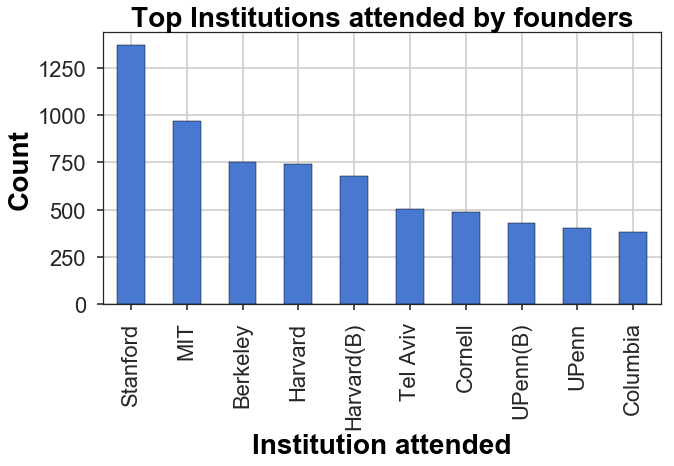

In [32]:
institutions_df['institution_uuid'].value_counts().head(10).plot.bar(figsize=(10,5))
plt.ylabel("Count")
plt.title("Top Institutions attended by founders")
plt.xlabel("Institution attended")

**Next Piece of Analysis...** 

This analysis will involve looking at the institutions this particular group of founders attended. We want to see whether the institution they attended differs for each of the Top 3 Highest Degree Types - Masters, Bachelors, PhD.

## Analysing Institutions of founders based on Highest Degree Achieved

To do this analysis we will have to group these founders based on their:
- unique person id (person_uuid)
- unique id of the startup they founded (org_uuid)
- unique id of the institution that they attended (institution_uuid)

We are then able to aggergate the first instance of the Highest Degree of the founder.

We will be looking at the 3 most popular degree types again for our analysis - **Bachelors, Masters, PhD**

**Combining business schools into institutions...** 

We are doing this because we want to show the institutions as a whole, not the separate schools within them.

In [33]:
# Combining Business Schools to Overall Institutions
founders_df_raw.loc[founders_df_raw['institution_uuid']=='Harvard(B)','institution_uuid'] = 'Harvard'
founders_df_raw.loc[founders_df_raw['institution_uuid']=='Stanford(B)','institution_uuid'] = 'Stanford'
founders_df_raw.loc[founders_df_raw['institution_uuid']=='UPenn(B)','institution_uuid'] = 'UPenn'

# grouping the founders by their unique person id
degrees_df = founders_df_raw.groupby(['person_uuid','org_uuid','institution_uuid'],as_index=False).agg({'Highest_Degree':'first'})
degrees_df.shape

(41044, 4)

### 1. Bachelors

First we will look at the top 5 institutions of founders who have attained a Bachelors as their Highest Degree.

In [34]:
# using a dataframe mask to filter Highest Degrees that are only Bachelors for our analysis
bachelors_founders = degrees_df[degrees_df['Highest_Degree']=='Bachelors']
# Setting the dataframe.is_copy to False prevents some warnings from appearing.
bachelors_founders.is_copy = False
bachelors_founders.head(5) 

,person_uuid,org_uuid,institution_uuid,Highest_Degree
2,000497ac-d3f9-7969-6c8b-b4050c8efc04,14658850-0cc9-15f8-62f3-a8c532ea6c61,922c1428-93c2-8e1e-cb37-327b83824426,Bachelors
6,00065f25-101a-bfe2-d79c-a172af342c70,6663f9d3-e6ab-348f-66c7-cafc00ce01a8,1fe3a91c-1f94-fecb-3774-b45618c9e4fa,Bachelors
7,00065f25-101a-bfe2-d79c-a172af342c70,a1102c6c-1bc4-b6aa-c5f2-6c34bd4b2370,1fe3a91c-1f94-fecb-3774-b45618c9e4fa,Bachelors
8,000792fb-3022-cac3-eea5-a93a49150727,7b224a36-b7b4-d02f-bf76-b4ac9ba085ca,8fea5416-d418-ede2-3a45-43507decf319,Bachelors
9,00082be1-4c28-c41f-6147-92d0e12629c8,000ad7a8-b868-f301-5f00-2a3361288fc9,15ef87ba-aa17-b1ed-6542-96b1e92663ee,Bachelors


**Value Counts for the top 5 institutions...**

In [35]:
bachelors_founders['institution_uuid'].value_counts().head(5)

Stanford    308
Berkeley    263
Harvard     240
UPenn       238
Tel Aviv    206
Name: institution_uuid, dtype: int64

**Plotting these values results in...**

Text(0.5,0,'Institution attended')

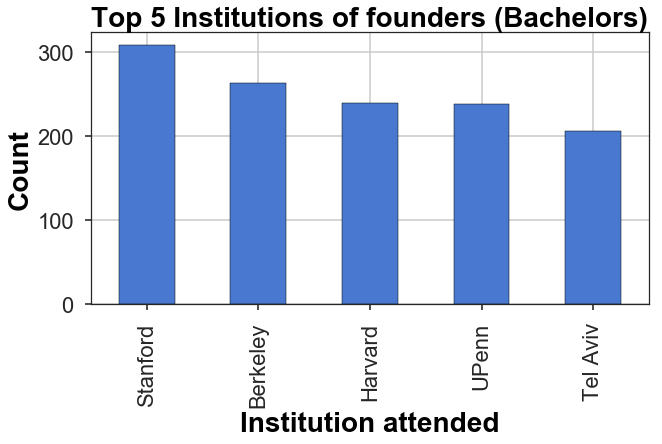

In [36]:
bachelors_founders['institution_uuid'].value_counts().head(5).plot.bar(figsize=(10,5))
plt.ylabel("Count")
plt.title("Top 5 Institutions of founders (Bachelors)")
plt.xlabel("Institution attended")

It was interesting to see the most popular institutions for the founders who had attained a Bachelors as their Highest Degree. Tel Aviv was an interesting university to see in this top 5.

### 2. Masters

First we will look at the top 5 institutions of founders who have attained a Masters as their Highest Degree.

In [37]:
masters_founders_df = degrees_df[degrees_df['Highest_Degree']=='Masters']
masters_founders_df.is_copy = False
masters_founders_df.head(5) 

,person_uuid,org_uuid,institution_uuid,Highest_Degree
3,000575b8-eac0-66b1-2a16-03c08c2b9f66,d2de0c01-397d-b4f1-8575-9b5e74e6b6b8,1eab62d2-15d9-0db7-930f-2aa77d4688e1,Masters
4,0005da7e-2311-9002-7756-ed2f2734e057,2aec3826-0f75-1f21-326a-5dbca9d5ff15,9850bb11-7d5a-85c7-349c-a8977ef7fbac,Masters
5,0005da7e-2311-9002-7756-ed2f2734e057,bd4c4326-ef34-d5d9-b689-0c0b0a6ba03c,9850bb11-7d5a-85c7-349c-a8977ef7fbac,Masters
17,00104afd-01f7-d1f0-90af-fff7af4a39ad,a8708f75-09ed-35f3-b346-272131dc977f,5339b107-c747-1fd1-62e1-bcd98ba18ecc,Masters
21,00163642-b6d8-2548-f825-a3e814a49a7f,b6959be1-c3a2-4147-25ef-4b100615c7fe,ab588ecb-9698-9009-de26-f4a57a3756c2,Masters


**Value Counts for the top 5 institutions...**

In [38]:
masters_founders_df['institution_uuid'].value_counts().head(5)

Stanford    1012
Harvard      925
UPenn        473
MIT          426
Berkeley     266
Name: institution_uuid, dtype: int64

**Plotting these values results in...**

Text(0.5,0,'Institution attended')

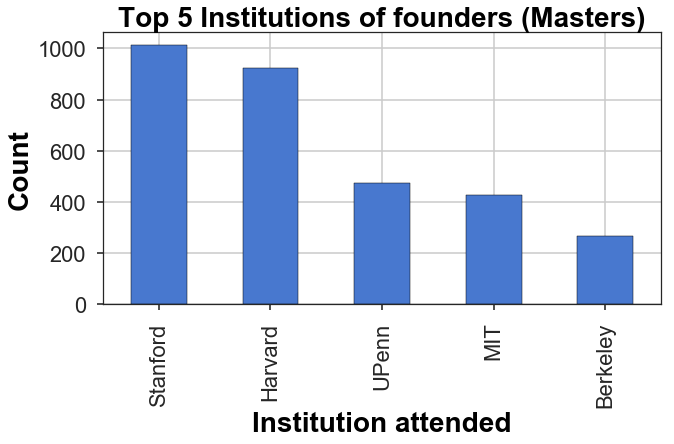

In [39]:
masters_founders_df['institution_uuid'].value_counts().head(5).plot.bar(figsize=(10,5))
plt.ylabel("Count")
plt.title("Top 5 Institutions of founders (Masters)")
plt.xlabel("Institution attended")

It was interesting to see the change of orders of institutions, however, it can be easily seen that Stanford and Harvard still dominate.

### 3. PhD

First we will look at the top 5 institutions of founders who have attained a PhD as their Highest Degree.

In [40]:
phd_founders = degrees_df[degrees_df['Highest_Degree']=='PhD']
phd_founders.head(5) 

,person_uuid,org_uuid,institution_uuid,Highest_Degree
0,00026df9-9254-269d-40b1-549e9529550d,d2d0cb83-b874-c5d7-c7f7-fb77613cc95b,3e893a4c-f191-b42c-5dab-4785e07d3c75,PhD
1,00026df9-9254-269d-40b1-549e9529550d,d2d0cb83-b874-c5d7-c7f7-fb77613cc95b,Cambridge,PhD
13,0009f5cb-b369-880a-9638-f4eece52f418,0c430e2d-0b76-258c-1d5e-b973cc3cd827,97649ea8-30db-0037-7904-32574f4f7129,PhD
14,0009f5cb-b369-880a-9638-f4eece52f418,0c430e2d-0b76-258c-1d5e-b973cc3cd827,ef948bad-e493-1056-0eda-e17bd1f6a60c,PhD
15,0009f5cb-b369-880a-9638-f4eece52f418,d4180d8b-c189-c227-8e7e-e274133023a4,97649ea8-30db-0037-7904-32574f4f7129,PhD


**Value Counts for the top 5 institutions...**

In [41]:
phd_founders['institution_uuid'].value_counts().head(5)

MIT          315
Stanford     308
Berkeley     190
Harvard      165
Cambridge     95
Name: institution_uuid, dtype: int64

**Plotting these values results in...**

Text(0.5,0,'Institution attended')

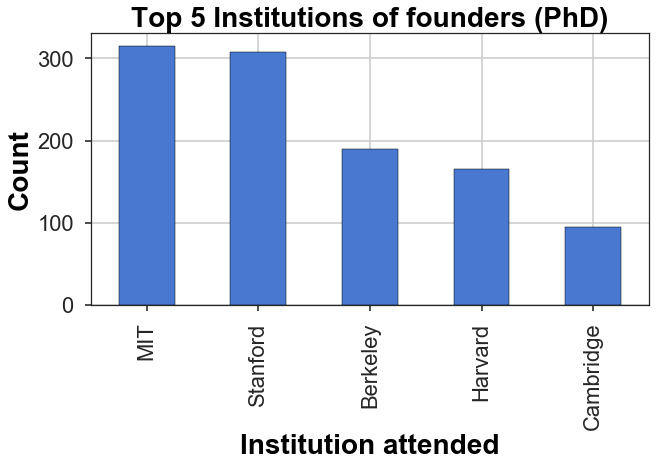

In [42]:
phd_founders['institution_uuid'].value_counts().head(5).plot.bar(figsize=(10,5))
plt.ylabel("Count")
plt.title("Top 5 Institutions of founders (PhD)")
plt.xlabel("Institution attended")

It was interesting to see that MIT is the most attended institution for founders who acheived a PhD as their Highest Degree

## Ratio of Bachelors, Masters and PhD for Top Institutions

Stacked bar chart that we used for our presentation is below. We wanted to see the split in Bachelors, Masters and PhD for each of the Top 5 institutions.
The Top 5 institutions were (when Business Schools taken into account):
- Stanford
- Harvard
- MIT
- UPenn
- Berkeley

We found these values from the filtered dataframes above and inputted them into independent arrays.

In [43]:
bachelors_founders['institution_uuid'].value_counts().head(10)

Stanford                                308
Berkeley                                263
Harvard                                 240
UPenn                                   238
Tel Aviv                                206
MIT                                     200
Cornell                                 160
Yale                                    145
1b483736-ba8b-3bcc-df47-403f4ac73848    125
ea148ca6-363d-04e4-c6eb-4219a3c5a076    124
Name: institution_uuid, dtype: int64

In [44]:
masters_founders_df['institution_uuid'].value_counts().head(10)

Stanford                                1012
Harvard                                  925
UPenn                                    473
MIT                                      426
Berkeley                                 266
Tel Aviv                                 246
Cornell                                  220
ec74a4ae-156b-5cba-82be-7922964ca376     204
Columbia                                 190
63165c75-96e3-b8d4-361b-add2d7569952     180
Name: institution_uuid, dtype: int64

In [45]:
phd_founders['institution_uuid'].value_counts().head(5)

MIT          315
Stanford     308
Berkeley     190
Harvard      165
Cambridge     95
Name: institution_uuid, dtype: int64

**Plotting these values results in...**

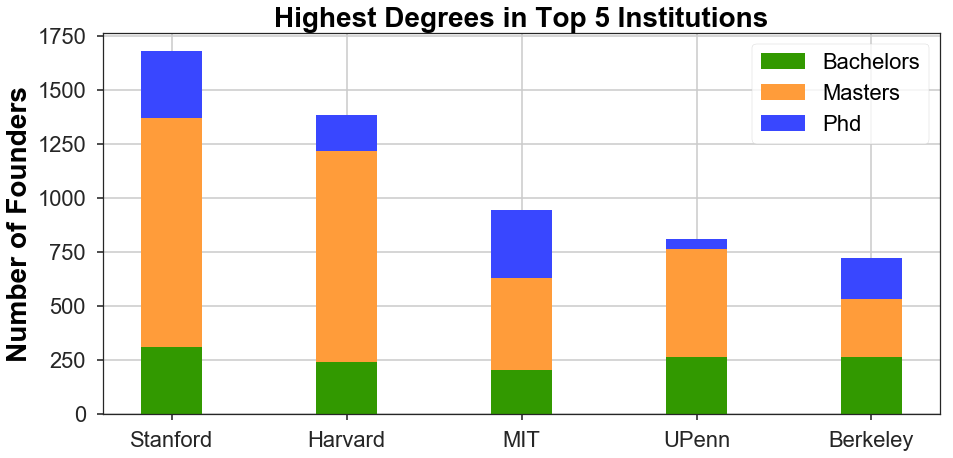

In [46]:
plt.figure(figsize=(15,7))

# The first values in each of these arrays are for Stanford, 2nd = Harvard, 3rd = MIT, 4th = UPenn, 5th = Berkeley
# We entered these from the value_count series above.
Bach_vals = np.array((308,240,200,263,263))
Mast_vals = np.array((1062,978,426,501,266))
phd_vals = np.array((309,166,315,45,190))

ind = np.arange(5)    
width = 0.35    

p1 = plt.bar(ind, Bach_vals, width, color='#329900', edgecolor="none")
p2 = plt.bar(ind, Mast_vals, width,  bottom=Bach_vals, color='#ff9c3a', edgecolor="none")
p3 = plt.bar(ind, phd_vals, width,  bottom=Bach_vals+Mast_vals, color='#3947ff', edgecolor="none")

plt.ylabel('Number of Founders')
plt.title('Highest Degrees in Top 5 Institutions')
plt.xticks(ind, ('Stanford', 'Harvard', 'MIT', 'UPenn', 'Berkeley'))
plt.legend((p1[0], p2[0], p3[0]), ('Bachelors', 'Masters', "Phd"), frameon=True)

plt.show()

**In Conclusion from this...**

This visualisation effectively shows the split of degree types in the Top 5 Institutions. It was interesting to see that MIT has a higher amount of PhD's being attained in comparison to UPenn for instance. We already knew this from our previous analysis but this visualisation shows all our previous analysis ideally. We used this in our presentation for this reason. Of course, from it, we are able to see that Stanford and Harvard dominate. From one glance at this visualisation you are also able to see that they are all American institutions. This is no surprise as our data is dominated by American Founders and Organisations.

## Saving the adjusted dataframe in pickle file
- Only updated institution_uuid's for universities we decoded. 14 in Total

In [47]:
founders_df_raw.to_pickle("../../data/analysis/200_analysis_RQ2.pkl")
founders_df_raw.shape

(44711, 55)